# Problem Definition

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

- Home Credit Group

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

### Data Description

See https://www.kaggle.com/c/home-credit-default-risk/data

There are 7 different sources of data:

* <b>application_train.csv</b>: contains the main training data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature `SK_ID_CURR`. The training application data comes with the `TARGET` indicating 0 (the loan was repaid) or 1 (the loan was not repaid). 
* <b>application_test.csv</b>: contains the main testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature `SK_ID_CURR`. 
* <b>bureau.csv</b>: contains data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* <b>bureau_balance.csv</b>: contains monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length. 
* <b>previous_application.csv</b>: contains previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature `SK_ID_PREV`. 
* <b>POS_CASH_BALANCE.csv</b>: contains monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* <b>credit_card_balance.csv</b>: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* <b>installments_payment.csv</b>: contains payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment. 

#### Imports

In [45]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import OneHotEncoder, Imputer, PolynomialFeatures

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

# Data

#### Main train data

In [3]:
train_df = pd.read_csv("data/application_train.csv")
train_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
train_df.shape

(307511, 122)

#### Test data

In [5]:
test_df = pd.read_csv("data/application_test.csv")
test_df.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
test_df.shape

(48744, 121)

# Data Analysis

#### Distribution of Y

In [7]:
train_df["TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

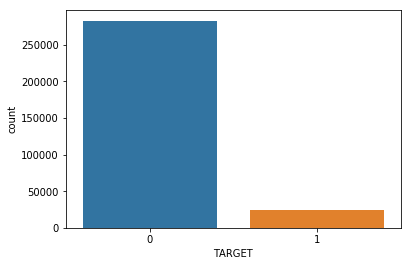

In [8]:
sns.countplot(x="TARGET", data=train_df)

It is clear that the distribution is unbalanced.

#### Missing values

In [9]:
missing_stats = pd.DataFrame(
    sorted(
        [(row, stat) 
         for row, stat in (train_df.isnull().sum()/train_df.shape[0]).items() 
         if stat>0], 
        key=lambda row: row[1], 
        reverse=True
    )
)
missing_stats.head()

,0,1
0,COMMONAREA_AVG,0.698723
1,COMMONAREA_MODE,0.698723
2,COMMONAREA_MEDI,0.698723
3,NONLIVINGAPARTMENTS_AVG,0.694330
4,NONLIVINGAPARTMENTS_MODE,0.694330


In [10]:
missing_stats.shape

(67, 2)

There are lot of columns with missing values. We need to deal with this. 

#### Data types

In [11]:
train_df.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

There are 16 categorical values.

In [12]:
train_df.select_dtypes(include=['object']).apply(pd.Series.nunique)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [13]:
test_df.select_dtypes(include=['object']).apply(pd.Series.nunique)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               7
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

Note that, not all categories in the training data are present in the test data.

In [14]:
train_df.CODE_GENDER.unique(), test_df.CODE_GENDER.unique()

(array(['M', 'F', 'XNA'], dtype=object), array(['F', 'M'], dtype=object))

In [15]:
train_df.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [16]:
train_df.NAME_INCOME_TYPE.unique(), test_df.NAME_INCOME_TYPE.unique()

(array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
        'Unemployed', 'Student', 'Businessman', 'Maternity leave'], dtype=object),
 array(['Working', 'State servant', 'Pensioner', 'Commercial associate',
        'Businessman', 'Student', 'Unemployed'], dtype=object))

In [17]:
train_df.NAME_INCOME_TYPE.value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [18]:
train_df.NAME_FAMILY_STATUS.unique(), test_df.NAME_FAMILY_STATUS.unique()

(array(['Single / not married', 'Married', 'Civil marriage', 'Widow',
        'Separated', 'Unknown'], dtype=object),
 array(['Married', 'Single / not married', 'Civil marriage', 'Widow',
        'Separated'], dtype=object))

In [19]:
train_df.NAME_FAMILY_STATUS.value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

Only three columns have extra categories, which very small counts.

We should convert categorical features to one-hot encoded features. This is due to the fact that implementations of most machine learning models cannot directly deal with categorical data. We can use pandas native one hot encoder. Howerver, to align train and test data, we can remove the additional columns, since they reflect only a small portion of data.

#### Correlations

In [20]:
train_data_correlation = train_df.corr()

In [21]:
target_correlation = train_data_correlation['TARGET'].sort_values(ascending=False)

In [22]:
target_correlation.head(11)[1:]

DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
Name: TARGET, dtype: float64

In [23]:
target_correlation.tail(10)

ELEVATORS_AVG                -0.034199
REGION_POPULATION_RELATIVE   -0.037227
AMT_GOODS_PRICE              -0.039645
FLOORSMAX_MODE               -0.043226
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_AVG                -0.044003
DAYS_EMPLOYED                -0.044932
EXT_SOURCE_1                 -0.155317
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_3                 -0.178919
Name: TARGET, dtype: float64

Looks like DAYS_BIRTH is the most (positively) correlated variable. Lets look closely at the variable.

In [24]:
age_repaid = abs(train_df[train_df.TARGET == 0].DAYS_BIRTH)/365
age_not_paid = abs(train_df[train_df.TARGET == 1].DAYS_BIRTH)/365

Text(0.5,0,'Age in years')

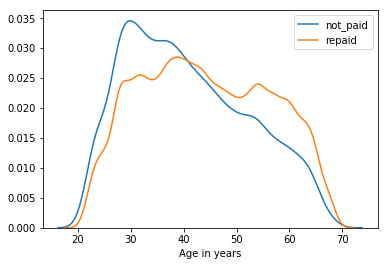

In [25]:
sns.kdeplot(age_not_paid, label='not_paid')
sns.kdeplot(age_repaid, label='repaid')
plt.xlabel('Age in years')

In [26]:
age_df = pd.DataFrame(train_df[['TARGET', 'DAYS_BIRTH']])
age_df['AGE'] = abs(train_df['DAYS_BIRTH'])/365

In [27]:
age_df['AGE_BIN'] = pd.cut(age_df['AGE'], bins=np.linspace(20, 70, num=11))
age_df.head()

,TARGET,DAYS_BIRTH,AGE,AGE_BIN
0,1,-9461,25.920548,"(25.0, 30.0]"
1,0,-16765,45.931507,"(45.0, 50.0]"
2,0,-19046,52.180822,"(50.0, 55.0]"
3,0,-19005,52.068493,"(50.0, 55.0]"
4,0,-19932,54.608219,"(50.0, 55.0]"


In [28]:
age_group_all = age_df.groupby(['AGE_BIN']).count()
age_group_all.reset_index()

,AGE_BIN,TARGET,DAYS_BIRTH,AGE
0,"(20.0, 25.0]",12159,12159,12159
1,"(25.0, 30.0]",32862,32862,32862
2,"(30.0, 35.0]",39440,39440,39440
3,"(35.0, 40.0]",42868,42868,42868
4,"(40.0, 45.0]",41406,41406,41406
5,"(45.0, 50.0]",35135,35135,35135
6,"(50.0, 55.0]",34942,34942,34942
7,"(55.0, 60.0]",33120,33120,33120
8,"(60.0, 65.0]",27476,27476,27476
9,"(65.0, 70.0]",8103,8103,8103


In [29]:
age_group_not_paid = age_df[age_df.TARGET==1].groupby(['AGE_BIN']).count()
age_group_not_paid.reset_index()

,AGE_BIN,TARGET,DAYS_BIRTH,AGE
0,"(20.0, 25.0]",1496,1496,1496
1,"(25.0, 30.0]",3662,3662,3662
2,"(30.0, 35.0]",4055,4055,4055
3,"(35.0, 40.0]",3833,3833,3833
4,"(40.0, 45.0]",3250,3250,3250
5,"(45.0, 50.0]",2606,2606,2606
6,"(50.0, 55.0]",2340,2340,2340
7,"(55.0, 60.0]",1832,1832,1832
8,"(60.0, 65.0]",1449,1449,1449
9,"(65.0, 70.0]",302,302,302


In [30]:
age_group_not_paid['fraction'] = age_group_not_paid['AGE']*100/age_group_all['AGE']

Text(0,0.5,'% unpaid')

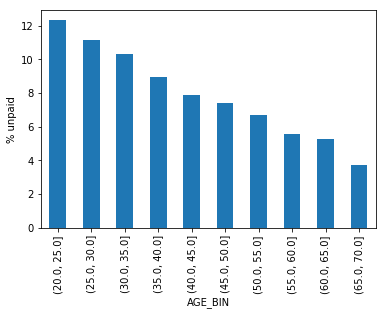

In [31]:
age_group_not_paid['fraction'].plot(kind='bar')
plt.ylabel('% unpaid')

Looks like probability to repay loan increases with with age.

External data sources are the most negatively correlated data sources. 

In [32]:
ext_src_correlation = train_df[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']].corr()

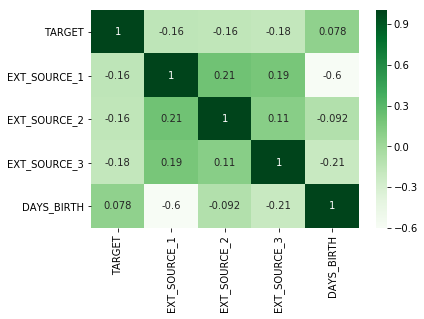

In [33]:
sns.heatmap(ext_src_correlation, annot=True, cmap="Greens")

In [36]:
external_repaid = train_df[train_df["TARGET"]==0]
external_not_paid = train_df[train_df["TARGET"]==1]

C:\Users\minhaj\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\minhaj\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


Text(0.5,0,'Density')

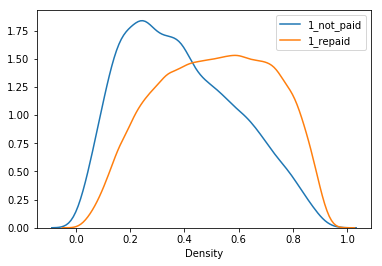

In [41]:
sns.kdeplot(external_not_paid['EXT_SOURCE_1'], label='1_not_paid')
sns.kdeplot(external_repaid['EXT_SOURCE_1'], label='1_repaid')
plt.xlabel('Density')

C:\Users\minhaj\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\minhaj\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


Text(0.5,0,'density')

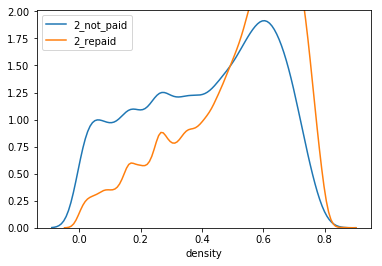

In [42]:
sns.kdeplot(external_not_paid['EXT_SOURCE_2'], label='2_not_paid')
sns.kdeplot(external_repaid['EXT_SOURCE_2'], label='2_repaid')
plt.xlabel('density')

C:\Users\minhaj\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\minhaj\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


Text(0.5,0,'density')

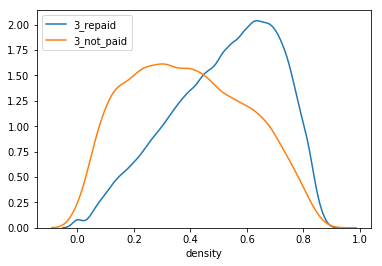

In [43]:
sns.kdeplot(external_repaid['EXT_SOURCE_3'], label='3_repaid')
sns.kdeplot(external_not_paid['EXT_SOURCE_3'], label='3_not_paid')
plt.xlabel('density')

#### Feature Engineering: Polynomial feature from correlated features

We learned that `TARGET` is positively correlated with `DAYS_BIRTH` and negatively correlated with `EXT_SOURCE_1`, `EXT_SOURCE_2`, and `EXT_SOURCE_3`. It is worth trying out polynomial features. The question is would it give any advantage.

Lets create the polynomial features.

In [46]:
imputer = Imputer(strategy='median')
transformer = PolynomialFeatures(degree=3)

In [53]:
feature_columns = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']

In [54]:
imputed_features = imputer.fit_transform(train_df[feature_columns])

In [55]:
poly_features = transformer.fit_transform(imputed_features)
poly_features_df = pd.DataFrame(poly_features, columns=transformer.get_feature_names(feature_columns))
poly_features_df['TARGET'] = train_df['TARGET']

In [56]:
poly_corr = poly_features_df.corr()